### Importing the data

Joining multiple files into one pandas dataframe

In [1]:
import os
import pandas as pd

directory_path = 'C:\\Users\\ellio\\documents\\data_analytics\\portfolio\\Electronics Sales Analysis (Python)\\Sales_Data'
files = os.listdir(directory_path)

df = pd.DataFrame()

for file in files:
    iterable_df = pd.read_csv(directory_path + '\\' + file)
    df = pd.concat([df, iterable_df])

### Cleaning the Data

Removing null rows, replacing null values, removing duplicates, other cleaning processing

In [2]:
#Removing null rows
df.dropna(how = 'all', inplace=True)

#Removing duplicates
df.drop_duplicates(inplace=True)

#Addressing Null values
df.isnull().value_counts()
#There are no null values

#There are rows in the dataframe with the column headers, these must be deleted
drop_index = df[df['Product'] == 'Product'].index
df.drop(drop_index, inplace = True)

#Reset index
df.reset_index(drop=True, inplace=True)

### Data Wrangling

Changing Data types, splitting purchase address, extracting month from the 'Order Date' column

In [3]:
#Changing data types for future analysis
df['Order ID'] = pd.to_numeric(df['Order ID'])
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [4]:
#Splitting Purchase address into street, city and state
df['Street Address'] = df['Purchase Address'].apply(lambda x: x.split(',')[0])
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
df['State'] = df['Purchase Address'].apply(lambda x: x.split(',')[2])
df[['Purchase Address', 'Street Address', 'City', 'State']]

,Purchase Address,Street Address,City,State
0,"917 1st St, Dallas, TX 75001",917 1st St,Dallas,TX 75001
1,"682 Chestnut St, Boston, MA 02215",682 Chestnut St,Boston,MA 02215
2,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA 90001
3,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA 90001
4,"333 8th St, Los Angeles, CA 90001",333 8th St,Los Angeles,CA 90001
...,...,...,...,...
185670,"840 Highland St, Los Angeles, CA 90001",840 Highland St,Los Angeles,CA 90001
185671,"216 Dogwood St, San Francisco, CA 94016",216 Dogwood St,San Francisco,CA 94016
185672,"220 12th St, San Francisco, CA 94016",220 12th St,San Francisco,CA 94016
185673,"511 Forest St, San Francisco, CA 94016",511 Forest St,San Francisco,CA 94016


In [5]:
#Extracting the date from the Order Date column
df['Month Number'] = pd.DatetimeIndex(df['Order Date']).month

In [6]:
#Changing the month number to month names
import calendar
df['Month'] = df['Month Number'].apply(lambda x: calendar.month_abbr[x])

In [7]:
df[['Order Date', 'Month Number','Month']]

,Order Date,Month Number,Month
0,04/19/19 08:46,4,Apr
1,04/07/19 22:30,4,Apr
2,04/12/19 14:38,4,Apr
3,04/12/19 14:38,4,Apr
4,04/30/19 09:27,4,Apr
...,...,...,...
185670,09/17/19 20:56,9,Sep
185671,09/01/19 16:00,9,Sep
185672,09/23/19 07:39,9,Sep
185673,09/19/19 17:30,9,Sep


### Descriptive Analysis - Taking measurements of the data, often things like count, frequency, averages

#### Question 1: What is the best month for sales?

In [8]:
#Making a Revenue Column
df['Revenue'] = df['Quantity Ordered'] * df['Price Each']

#Group by month
Month_Revenue_df = df[['Month', 'Revenue']].groupby(df['Month Number']).sum().reset_index()
Month_Revenue_df['Month'] = Month_Revenue_df['Month Number'].apply(lambda x: calendar.month_abbr[x])
Month_Revenue_df

,Month Number,Revenue,Month
0,1,1.821313e+06,Jan
1,2,2.200075e+06,Feb
2,3,2.804970e+06,Mar
3,4,3.389218e+06,Apr
4,5,3.150506e+06,May
5,6,2.576268e+06,Jun
6,7,2.646311e+06,Jul
7,8,2.241071e+06,Aug
8,9,2.094454e+06,Sep
9,10,3.734178e+06,Oct


In [9]:
#Import Matplotlib
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Monthly Revenue in USD')

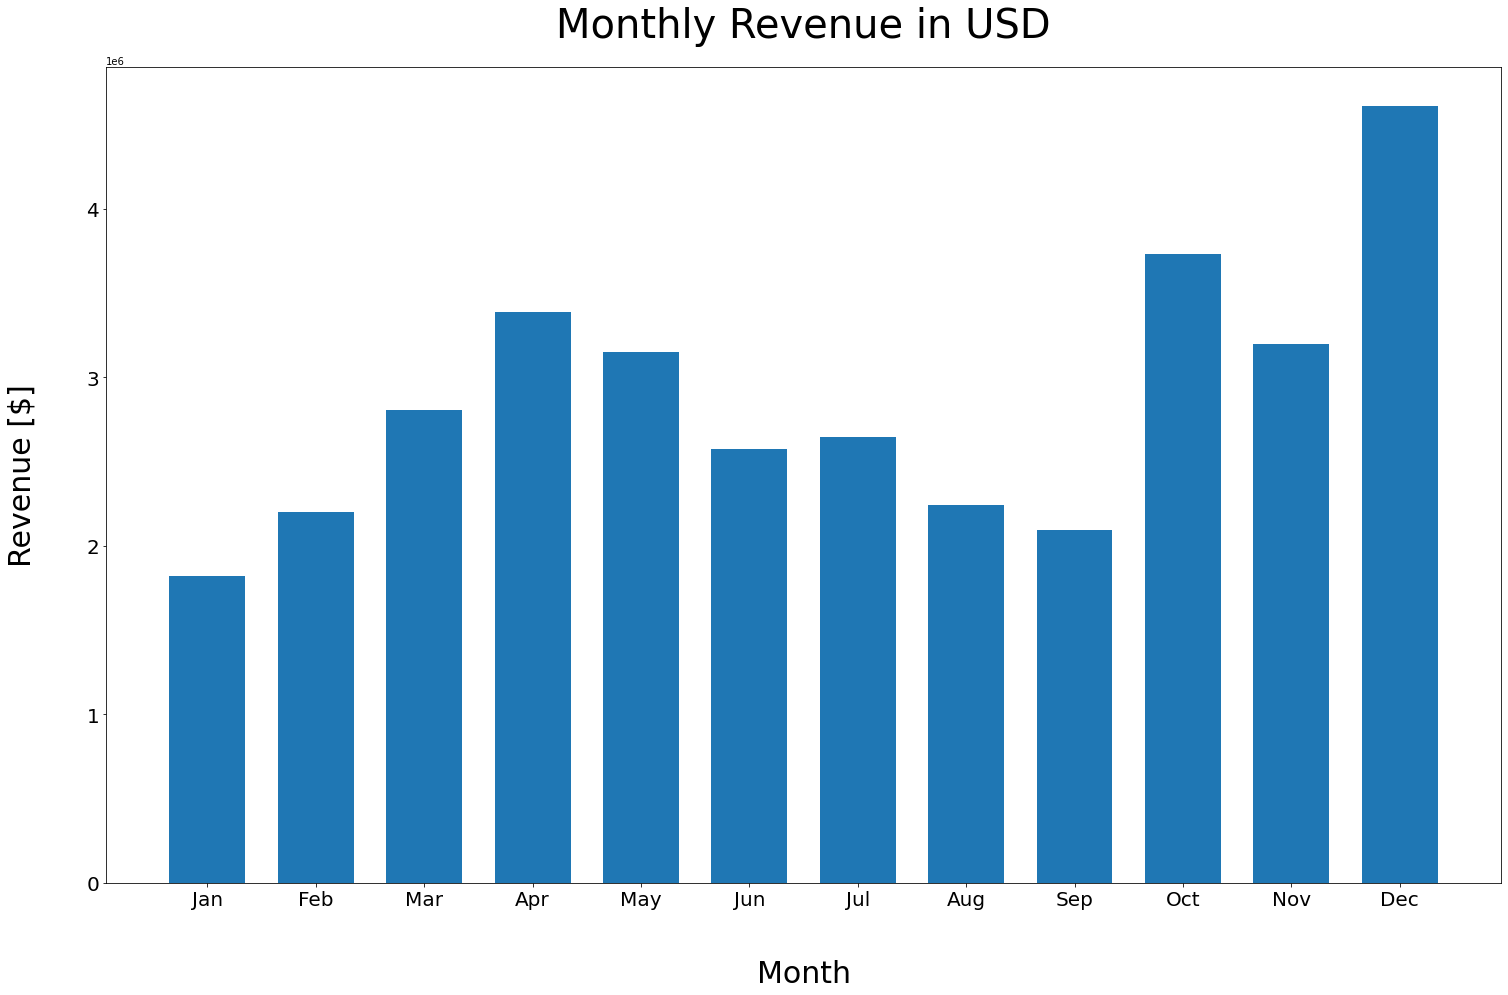

In [10]:
#Create bar chart
plt.figure(figsize=[25,15])
plt.bar(Month_Revenue_df['Month'], Month_Revenue_df['Revenue'], width=0.7)
plt.ylabel('Revenue [$]', fontsize=30, labelpad=50)
plt.xlabel('Month', fontsize=30, labelpad=50)
plt.tick_params(labelsize=20)
plt.title('Monthly Revenue in USD', fontsize=40, pad=30)

#### Question 2: What is the best state for sales?

In [11]:
#Make adjustments to state column to ensure duplicate city names are accounted for. e.g. Portland Oregon and Portland Maine
df['City Adjusted'] = df['Purchase Address'].apply(lambda x: str(x.split(',')[1] + " (" + x.split(",")[2].split(" ")[1] + ")"))

State_Revenue_df = df[['City Adjusted', 'Revenue']].groupby('City Adjusted').sum().sort_values('Revenue', ascending=False).reset_index()
State_Revenue_df

,City Adjusted,Revenue
0,San Francisco (CA),8.254610e+06
1,Los Angeles (CA),5.448280e+06
2,New York City (NY),4.661714e+06
3,Boston (MA),3.657928e+06
4,Atlanta (GA),2.794195e+06
5,Dallas (TX),2.765374e+06
6,Seattle (WA),2.745046e+06
7,Portland (OR),1.870011e+06
8,Austin (TX),1.818029e+06
9,Portland (ME),4.493214e+05


Text(0.5, 1.0, 'Revenue by State in USD')

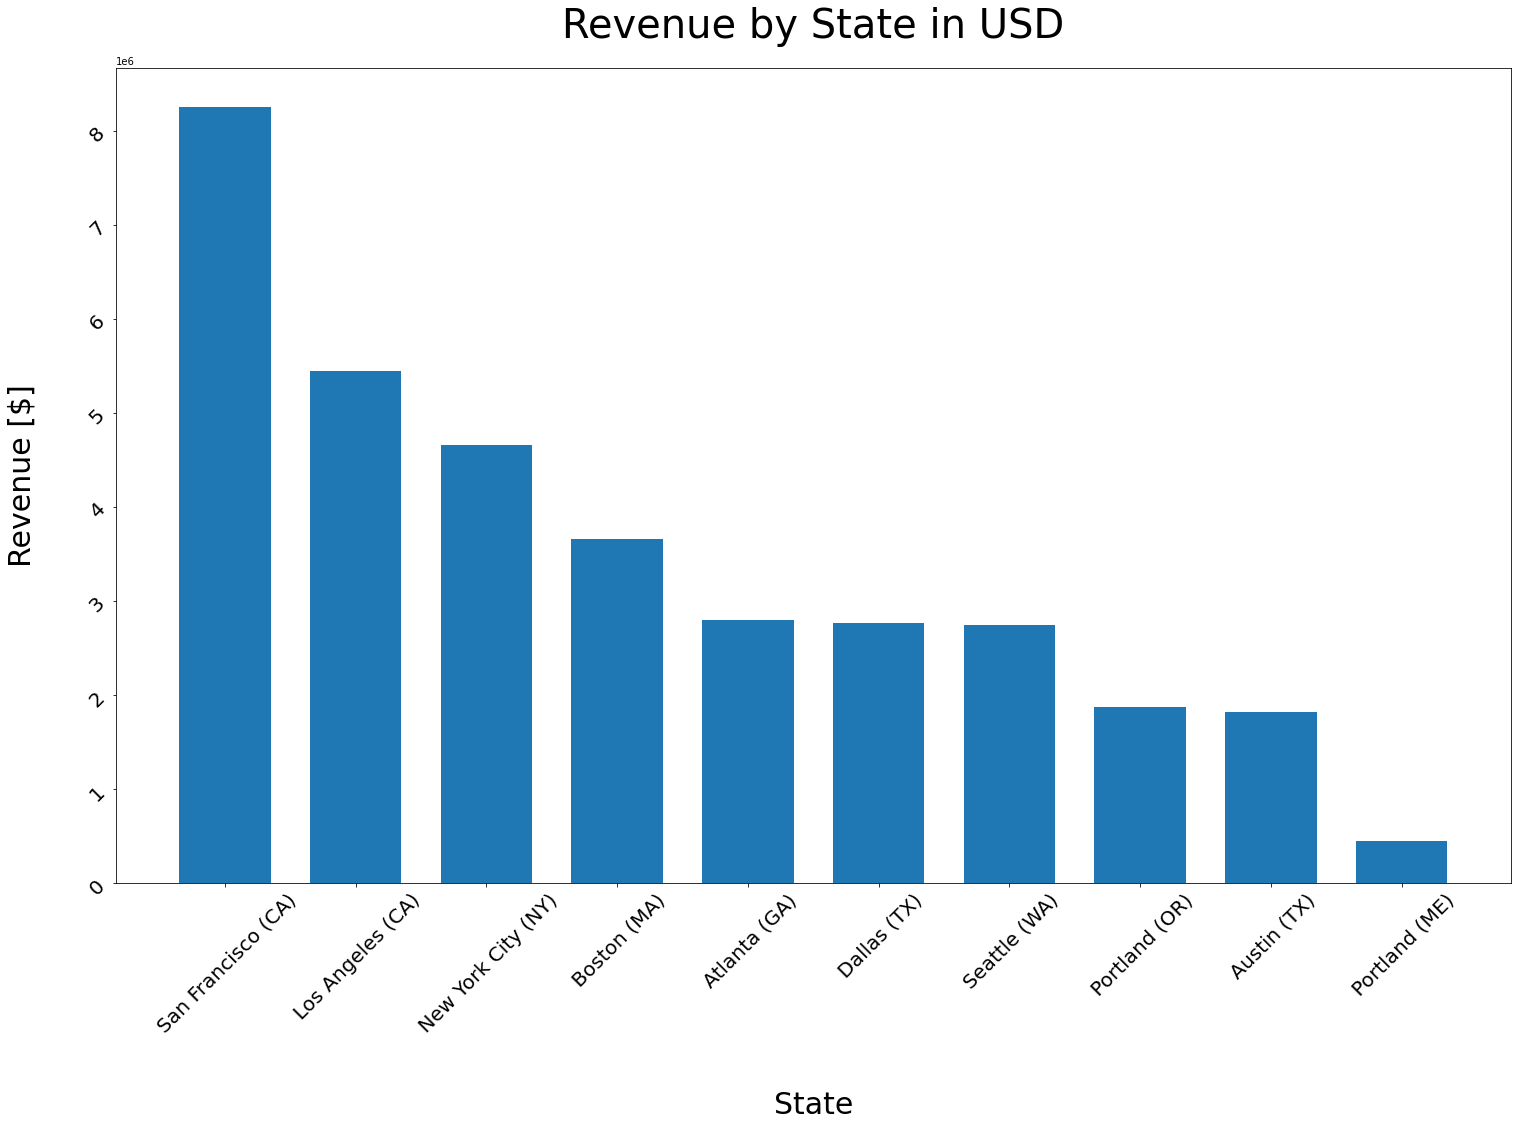

In [12]:
#Visualizing the findings in a bar chart
plt.figure(figsize=[25,15])
plt.bar(State_Revenue_df['City Adjusted'], State_Revenue_df['Revenue'], width=0.7)
plt.ylabel('Revenue [$]', fontsize=30, labelpad=50)
plt.xlabel('State', fontsize=30, labelpad=50)
plt.tick_params(labelsize=20, labelrotation=45)
plt.title('Revenue by State in USD', fontsize=40, pad=30)

#### Question 3: What time should we display advertisements to maximize the liklihood of sales?

In [13]:
#Converting Order Date column to date time data type
df['Order Date'] = pd.to_datetime(df['Order Date'])

#Adding hour and minute columns
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
Hour_Revenue_df = df[['Hour', 'Revenue']].groupby('Hour').sum().sort_values('Hour', ascending=True).reset_index()

Text(0.5, 1.0, 'Revenue through the day')

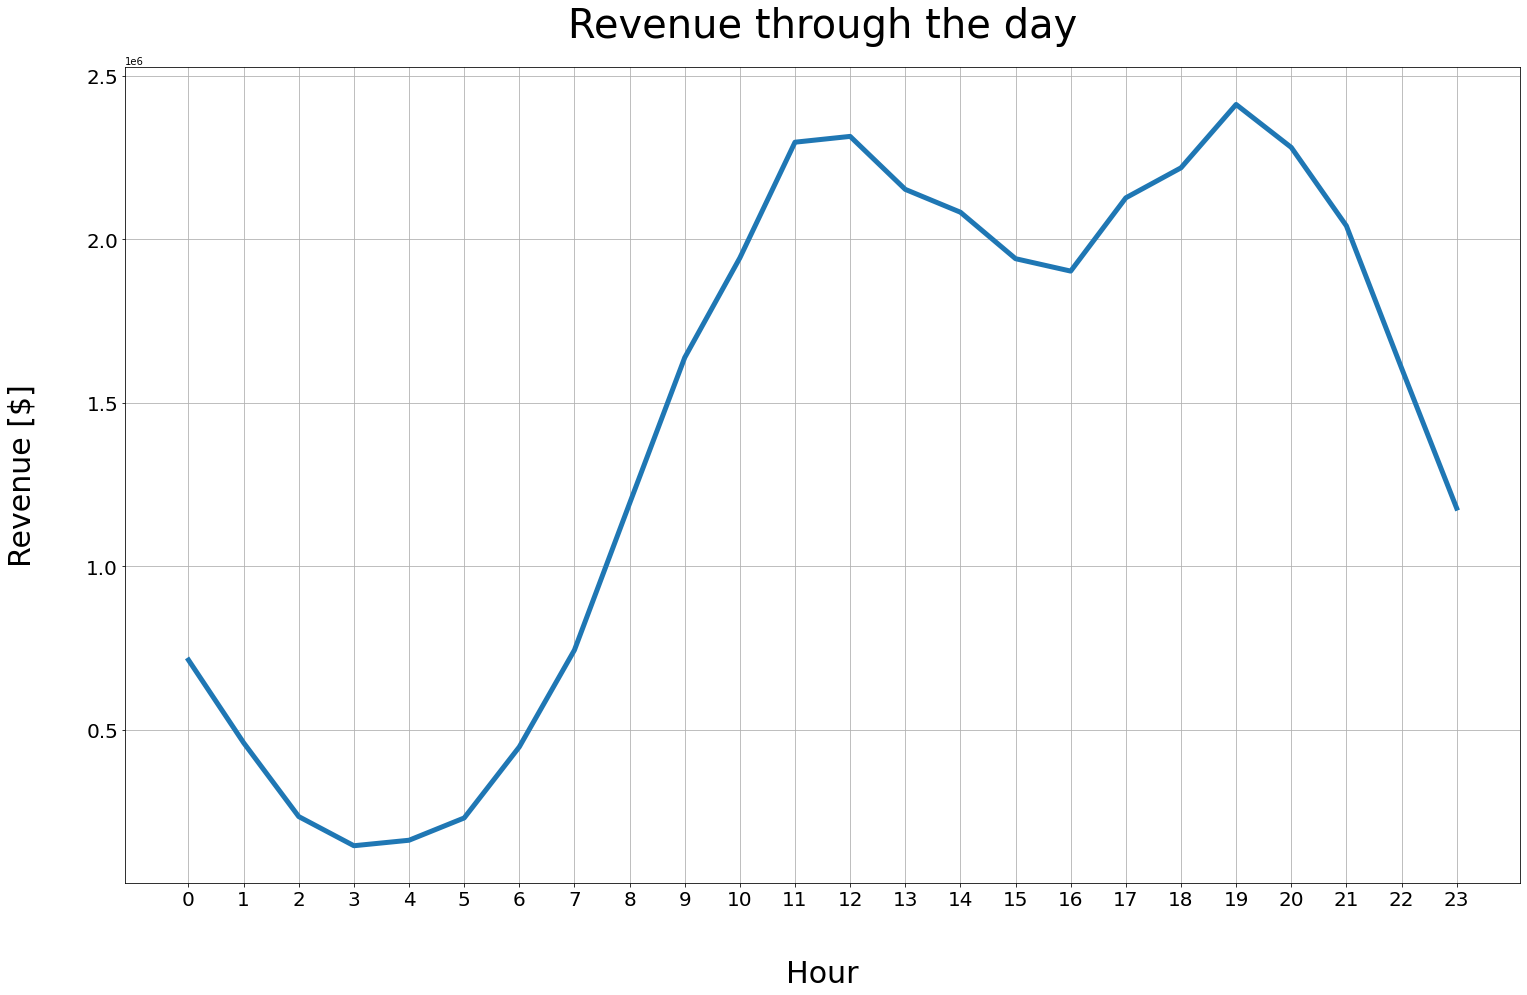

In [14]:
#Visualize with a line graph
plt.figure(figsize=[25,15])
plt.plot(Hour_Revenue_df['Hour'], Hour_Revenue_df['Revenue'], linewidth=5)
plt.ylabel('Revenue [$]', fontsize=30, labelpad=50)
plt.xlabel('Hour', fontsize=30, labelpad=50)
plt.tick_params(labelsize=20)
plt.xticks(Hour_Revenue_df['Hour'])
plt.grid()
plt.title('Revenue through the day', fontsize=40, pad=30)

#Peak Revenue at 11:00 and 19:00. Advertising should be conducted judt before peak times

#### Question 3 Extension: Best times to advertise in the top 3 performing locations?

Text(0.5, 1.0, 'San Francisco Revenue Throughout the Day')

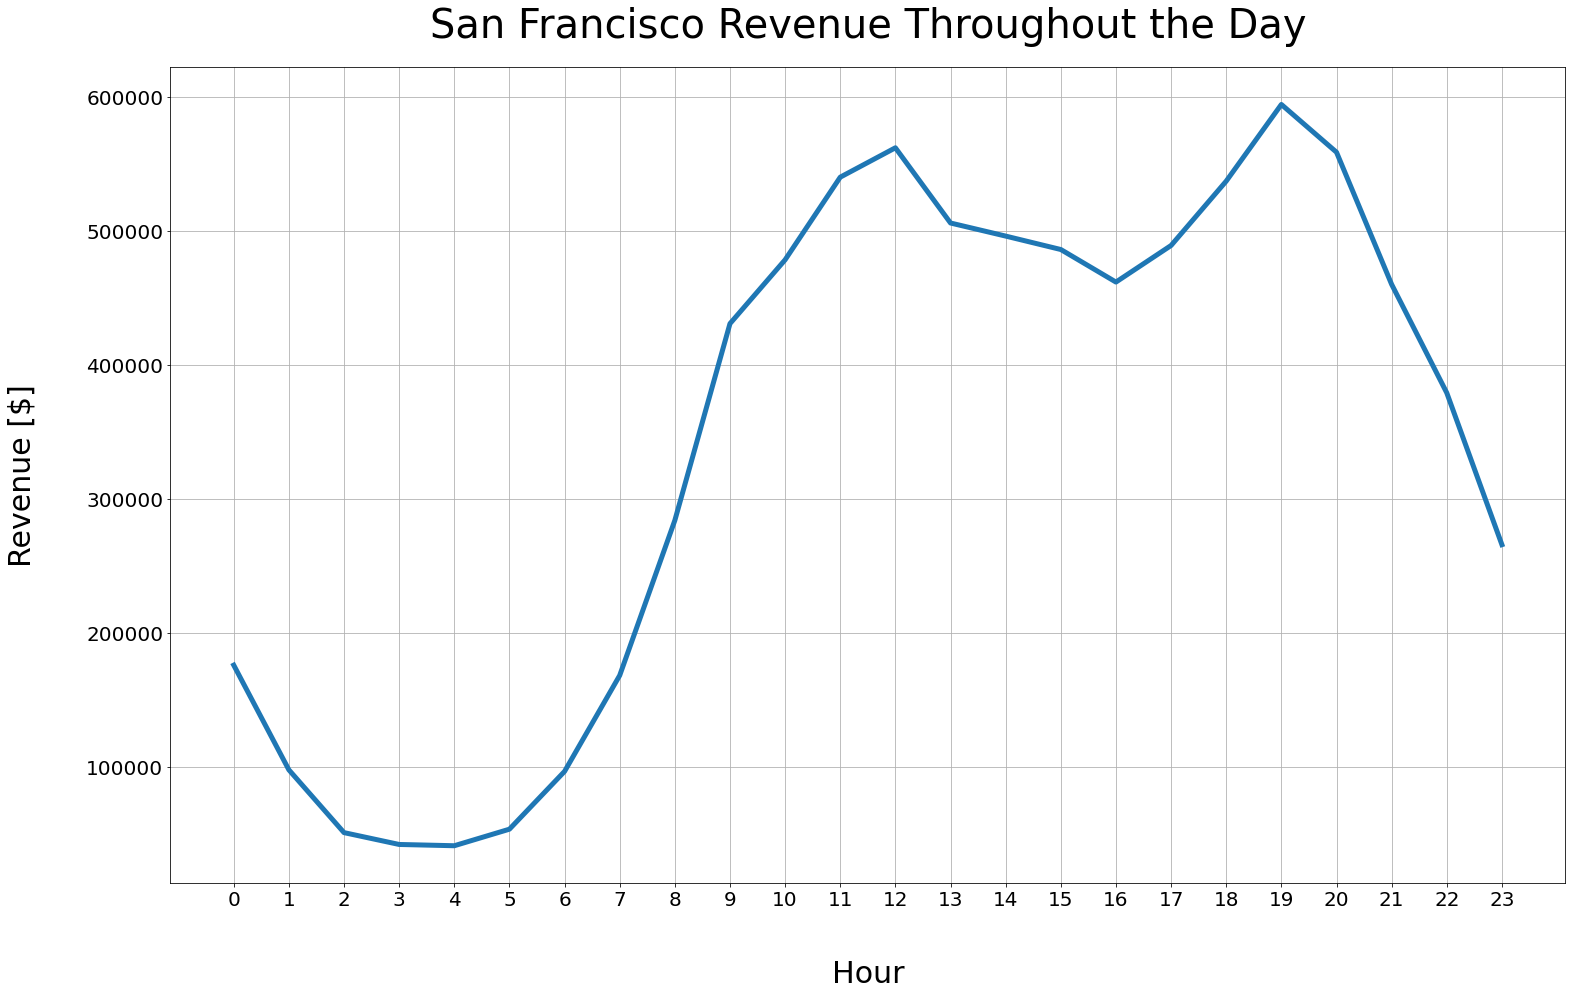

In [15]:
# San Fransisco (CA)

San_Francisco_df = df[df['City Adjusted'] == ' San Francisco (CA)'].groupby('Hour').sum().reset_index()

#Visualize with line graph
plt.figure(figsize=[25,15])
plt.plot(San_Francisco_df['Hour'], San_Francisco_df['Revenue'], linewidth=5)
plt.ylabel('Revenue [$]', fontsize=30, labelpad=50)
plt.xlabel('Hour', fontsize=30, labelpad=50)
plt.tick_params(labelsize=20)
plt.xticks(San_Francisco_df['Hour'])
plt.grid()
plt.title('San Francisco Revenue Throughout the Day', fontsize=40, pad=30)

Text(0.5, 1.0, 'Los Angeles Revenue Throughout the Day')

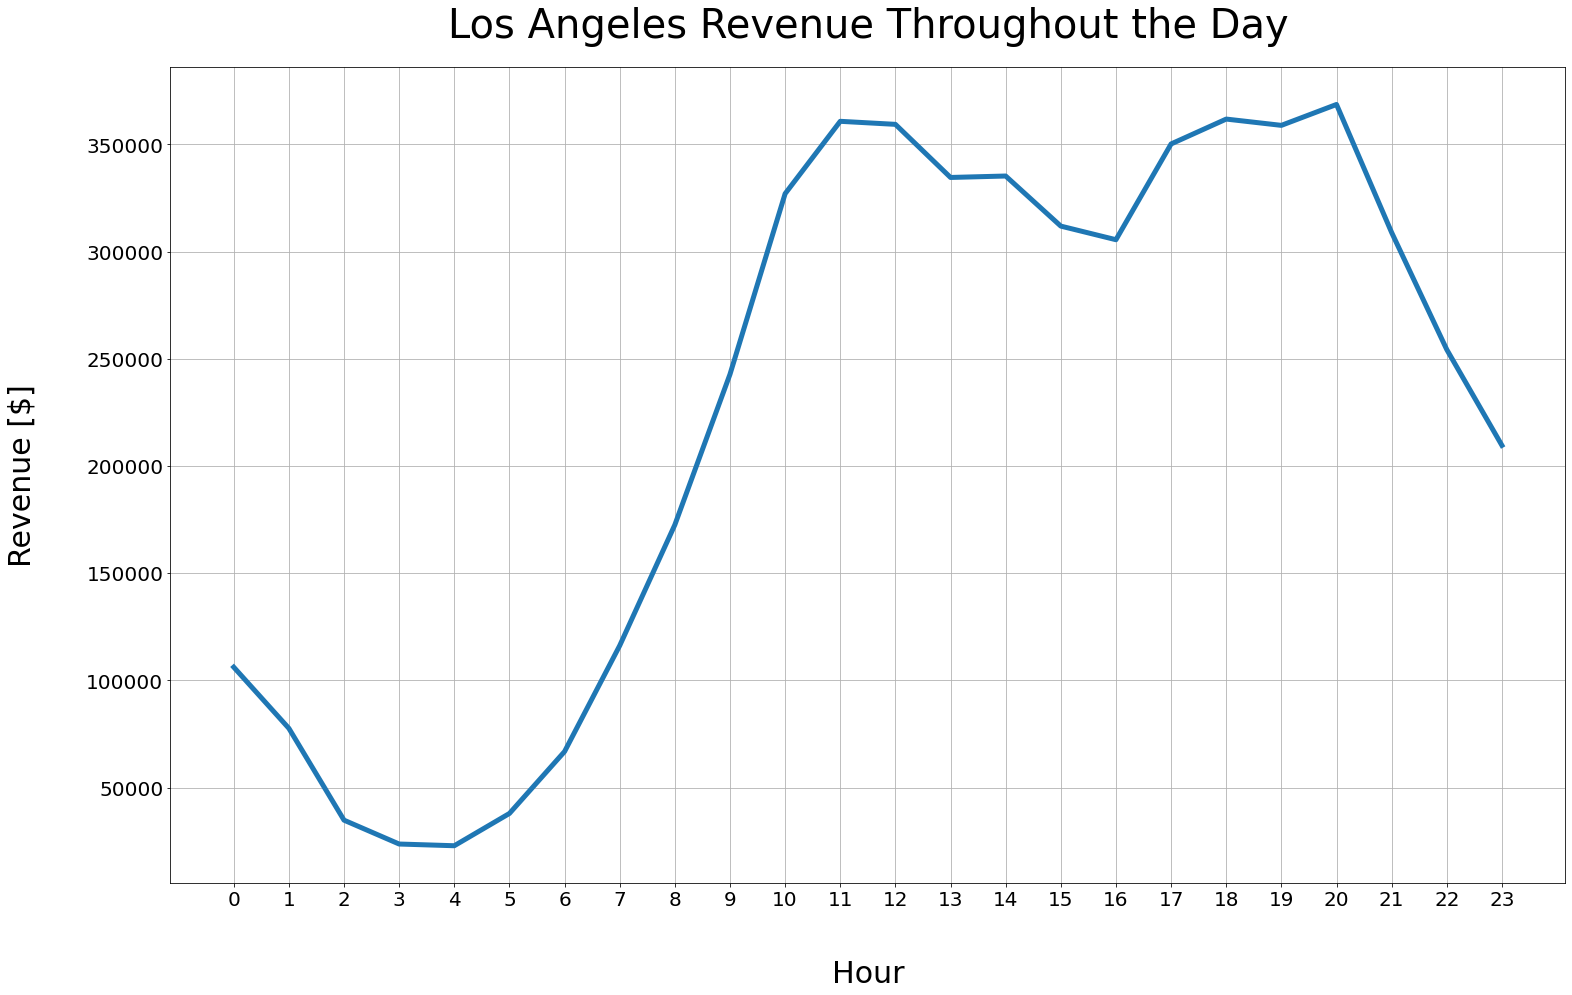

In [16]:
# Los Angeles (CA)
Los_Angeles_df = df[df['City Adjusted'] == ' Los Angeles (CA)'].groupby('Hour').sum().reset_index()

#Visualize with line graph
plt.figure(figsize=[25,15])
plt.plot(Los_Angeles_df['Hour'], Los_Angeles_df['Revenue'], linewidth=5)
plt.ylabel('Revenue [$]', fontsize=30, labelpad=50)
plt.xlabel('Hour', fontsize=30, labelpad=50)
plt.tick_params(labelsize=20)
plt.xticks(Los_Angeles_df['Hour'])
plt.grid()
plt.title('Los Angeles Revenue Throughout the Day', fontsize=40, pad=30)

Text(0.5, 1.0, 'New York Revenue Throughout the Day')

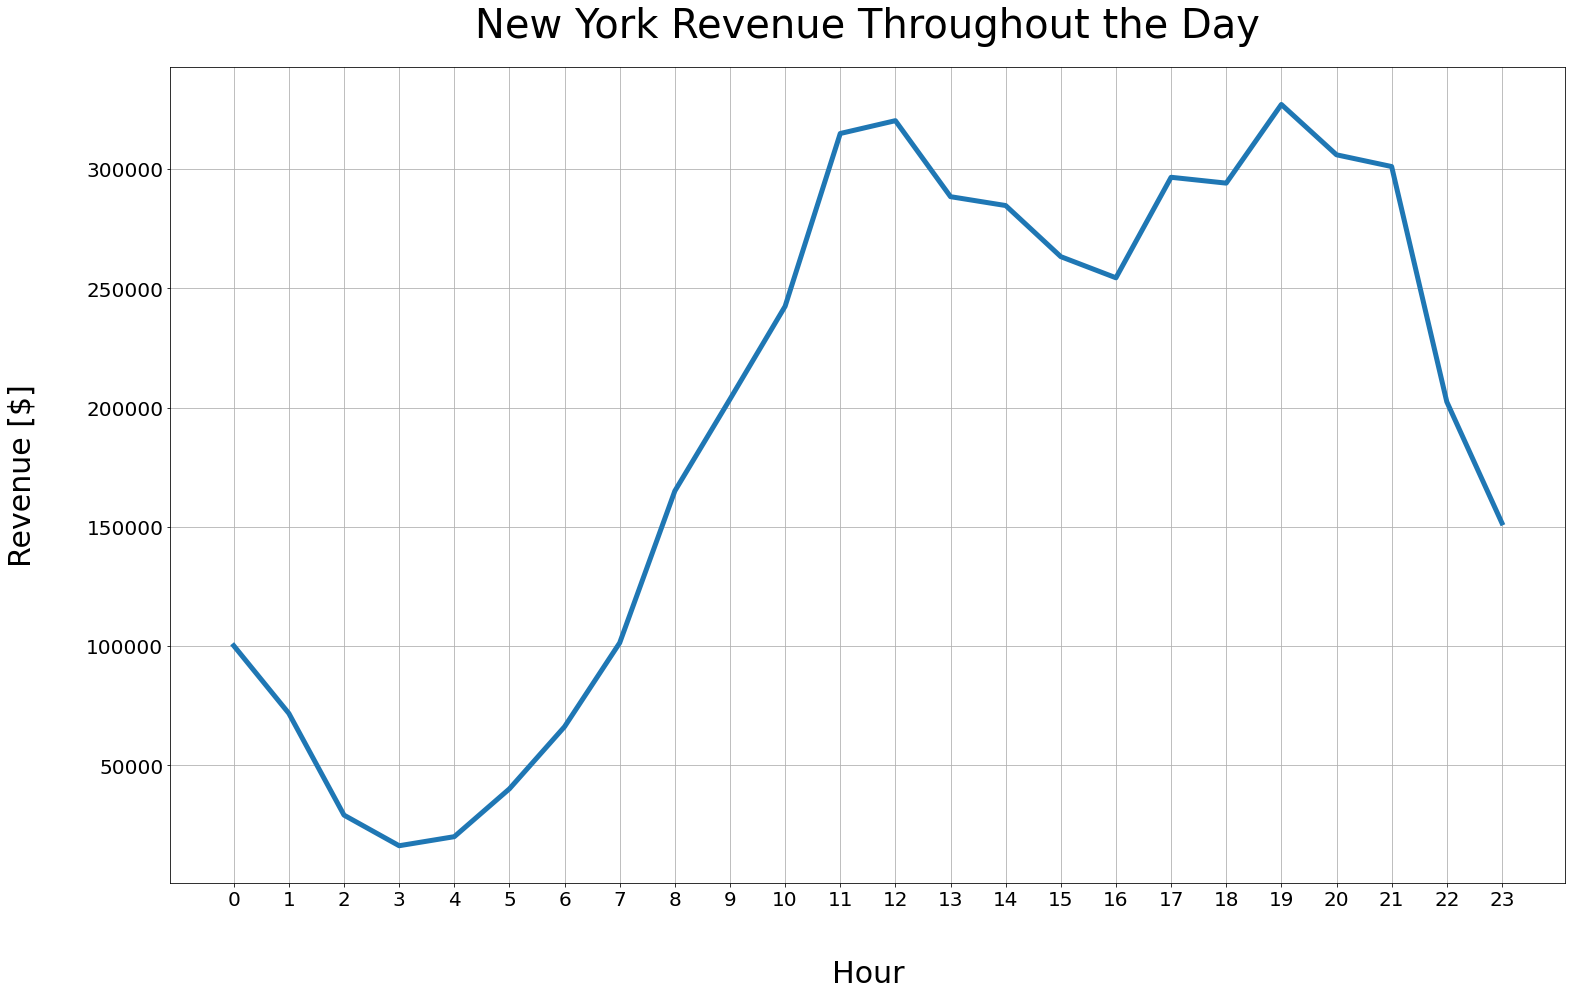

In [17]:
#New York City (NY)

New_York_df = df[df['City Adjusted'] == ' New York City (NY)'].groupby('Hour').sum().reset_index()
New_York_df

#Visualize with line graph
plt.figure(figsize=[25,15])
plt.plot(New_York_df['Hour'], New_York_df['Revenue'], linewidth=5)
plt.ylabel('Revenue [$]', fontsize=30, labelpad=50)
plt.xlabel('Hour', fontsize=30, labelpad=50)
plt.tick_params(labelsize=20)
plt.xticks(New_York_df['Hour'])
plt.grid()
plt.title('New York Revenue Throughout the Day', fontsize=40, pad=30)

#### Question 4: Which items are often sold together?

In [18]:
# Create new dataframe exclusively containing duplicate order ID's
multiple_item_df = df[df['Order ID'].duplicated(keep=False)]
multiple_item_df.shape

(14128, 15)

In [19]:
# Create new 'Grouped Product' column to show combined products of same Order ID in a single cell
multiple_item_df['Grouped Product'] = multiple_item_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

<ipython-input-19-a5a9c62bc891>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_item_df['Grouped Product'] = multiple_item_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [20]:
#multiple_item_df['Grouped Product'] = multiple_item_df.groupby('Order ID')['Product'].transform(lambda x: ' , '.join(x))
# YOU CANNOT USE ' , ' WITH TWO SPACES.
#BECAUSE IT MAKES TWO TYPES OF THE SAME PRODUCT...ONE WITH THE SPACE AT THE BEGINNING AND ONE AT THE END

In [21]:
multiple_item_df['Grouped Product'].value_counts()

iPhone,Lightning Charging Cable                1772
Google Phone,USB-C Charging Cable              1714
iPhone,Wired Headphones                         722
Vareebadd Phone,USB-C Charging Cable            624
Google Phone,Wired Headphones                   606
                                               ... 
LG Washing Machine,Apple Airpods Headphones       2
Google Phone,27in 4K Gaming Monitor               2
LG Dryer,Flatscreen TV                            2
LG Washing Machine,Wired Headphones               2
LG Dryer,Vareebadd Phone                          2
Name: Grouped Product, Length: 350, dtype: int64

In [22]:
# THIS IS ONE WAY OF DOING IT
# Before counting the frequency of which products are bought together we must remove the rows where 'Order ID' and 'Grouped Product' are duplicated
#multiple_item_df.drop_duplicates(['Order ID', 'Grouped Product'], inplace=True)
#multiple_item_df = multiple_item_df[['Order ID', 'Grouped Product']].drop_duplicates()
#multiple_item_df.head()

In [23]:
multiple_item_df.drop_duplicates(['Order ID', 'Grouped Product'], inplace=True)

<ipython-input-23-989d711233ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_item_df.drop_duplicates(['Order ID', 'Grouped Product'], inplace=True)


In [24]:
multiple_item_df['Grouped Product'].value_counts() #Length 350

iPhone,Lightning Charging Cable                           886
Google Phone,USB-C Charging Cable                         857
iPhone,Wired Headphones                                   361
Vareebadd Phone,USB-C Charging Cable                      312
Google Phone,Wired Headphones                             303
                                                         ... 
Google Phone,Flatscreen TV                                  1
LG Dryer,Flatscreen TV                                      1
LG Dryer,Wired Headphones                                   1
ThinkPad Laptop,Vareebadd Phone                             1
iPhone,Lightning Charging Cable,27in 4K Gaming Monitor      1
Name: Grouped Product, Length: 350, dtype: int64

## All the following code used to answer questions is not accurate. Need to use import and combinations libraries. The method you have done does not account for different orders of the same two products in the dataframe.

In [25]:
# In order to count frequency of product combinations need to import combinations and counter libraries
from itertools import combinations
from collections import Counter

In [26]:
list = multiple_item_df['Grouped Product']

count = Counter()

for sublist in list:
    sub_sublist = sublist.split(',')
    count.update(Counter(combinations(sub_sublist, 2)))

product_combination_df = pd.DataFrame.from_dict(count, orient='index')
product_combination_df.reset_index(inplace=True)
product_combination_df.columns = ['Product Combination', 'Quantity']
top10_product_combination_df = product_combination_df.sort_values('Quantity', ascending=False).reset_index(drop=True).head(10)
top10_product_combination_df

,Product Combination,Quantity
0,"(iPhone, Lightning Charging Cable)",1002
1,"(Google Phone, USB-C Charging Cable)",985
2,"(iPhone, Wired Headphones)",447
3,"(Google Phone, Wired Headphones)",413
4,"(Vareebadd Phone, USB-C Charging Cable)",361
5,"(iPhone, Apple Airpods Headphones)",360
6,"(Google Phone, Bose SoundSport Headphones)",220
7,"(USB-C Charging Cable, Wired Headphones)",159
8,"(Vareebadd Phone, Wired Headphones)",143
9,"(Lightning Charging Cable, Wired Headphones)",92


#### Question 4 Extension: What are the most popular product combinations for each of the top 3 performing locations in terms of revenue?

In [27]:
# San Francisco (CA)

top10_San_Fransico_multiple_item_df = multiple_item_df[multiple_item_df['City Adjusted'] == ' San Francisco (CA)']

count = Counter()

list = top10_San_Fransico_multiple_item_df['Grouped Product']

for sublist in list:
    sub_sublist = sublist.split(',')
    count.update(Counter(combinations(sub_sublist, 2)))

count

top10_San_Francisco_product_combination_df = pd.DataFrame.from_dict(count, orient='index').reset_index()
top10_San_Francisco_product_combination_df.columns = ['Product Combination', 'Quantity']
top10_San_Francisco_product_combination_df = top10_San_Francisco_product_combination_df.sort_values('Quantity', ascending=False).head(10).reset_index(drop=True)
top10_San_Francisco_product_combination_df

,Product Combination,Quantity
0,"(iPhone, Lightning Charging Cable)",250
1,"(Google Phone, USB-C Charging Cable)",239
2,"(iPhone, Wired Headphones)",116
3,"(iPhone, Apple Airpods Headphones)",95
4,"(Google Phone, Wired Headphones)",90
5,"(Vareebadd Phone, USB-C Charging Cable)",89
6,"(Google Phone, Bose SoundSport Headphones)",51
7,"(USB-C Charging Cable, Wired Headphones)",47
8,"(Vareebadd Phone, Wired Headphones)",40
9,"(Lightning Charging Cable, Wired Headphones)",27


In [28]:
#Visualizing with a bar chart
#plt.figure(figsize=[25,15])
#plt.bar(top10_San_Francisco_product_combination_df['Product Combination'], top10_San_Francisco_product_combination_df['Quantity'], width=0.7)
#plt.ylabel('Number of Orders', fontsize=30, labelpad=50)
#plt.xlabel('Product Combination', fontsize=30, labelpad=50)
#plt.tick_params(labelsize=20, labelrotation=90)
#plt.title('Frequency of different order combinations in San Francisco', fontsize=40, pad=30)
#plt.show()

#GET AN ERROR TRYING TO VISUALIZE THE DATA, ONE OF THE COLUMNS IS A TUPLE?

In [29]:
# Los Angeles (CA)

top10_Los_Angeles_multiple_item_df = multiple_item_df[multiple_item_df['City Adjusted'] == ' Los Angeles (CA)']

count = Counter()

list = top10_Los_Angeles_multiple_item_df['Grouped Product']

for sublist in list:
    sub_sublist = sublist.split(',')
    count.update(Counter(combinations(sub_sublist, 2)))

count

top10_Los_Angeles_product_combination_df = pd.DataFrame.from_dict(count, orient='index').reset_index()
top10_Los_Angeles_product_combination_df.columns = ['Product Combination', 'Quantity']
top10_Los_Angeles_product_combination_df = top10_Los_Angeles_product_combination_df.sort_values('Quantity', ascending=False).head(10).reset_index(drop=True)
top10_Los_Angeles_product_combination_df

,Product Combination,Quantity
0,"(iPhone, Lightning Charging Cable)",149
1,"(Google Phone, USB-C Charging Cable)",142
2,"(Google Phone, Wired Headphones)",69
3,"(iPhone, Apple Airpods Headphones)",61
4,"(iPhone, Wired Headphones)",57
5,"(Vareebadd Phone, USB-C Charging Cable)",38
6,"(Google Phone, Bose SoundSport Headphones)",26
7,"(USB-C Charging Cable, Wired Headphones)",24
8,"(Vareebadd Phone, Wired Headphones)",22
9,"(Vareebadd Phone, Bose SoundSport Headphones)",16


In [30]:
top10_New_York_multiple_item_df = multiple_item_df[multiple_item_df['City Adjusted'] == ' New York City (NY)']

count = Counter()

list = top10_New_York_multiple_item_df['Grouped Product']

for sublist in list:
    sub_sublist = sublist.split(',')
    count.update(Counter(combinations(sub_sublist, 2)))

count

top10_New_York_product_combination_df = pd.DataFrame.from_dict(count, orient='index').reset_index()
top10_New_York_product_combination_df.columns = ['Product Combination', 'Quantity']
top10_New_York_product_combination_df = top10_New_York_product_combination_df.sort_values('Quantity', ascending=False).head(10).reset_index(drop=True)
top10_New_York_product_combination_df

,Product Combination,Quantity
0,"(iPhone, Lightning Charging Cable)",141
1,"(Google Phone, USB-C Charging Cable)",139
2,"(Google Phone, Wired Headphones)",66
3,"(Vareebadd Phone, USB-C Charging Cable)",55
4,"(iPhone, Apple Airpods Headphones)",54
5,"(iPhone, Wired Headphones)",53
6,"(Google Phone, Bose SoundSport Headphones)",29
7,"(USB-C Charging Cable, Wired Headphones)",22
8,"(Vareebadd Phone, Wired Headphones)",22
9,"(Apple Airpods Headphones, Wired Headphones)",14


#### Question 5: Which product sold the most and why?

In [31]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Street Address,City,State,Month Number,Month,Revenue,City Adjusted,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",917 1st St,Dallas,TX 75001,4,Apr,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",682 Chestnut St,Boston,MA 02215,4,Apr,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA 90001,4,Apr,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA 90001,4,Apr,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",333 8th St,Los Angeles,CA 90001,4,Apr,11.99,Los Angeles (CA),9,27


In [32]:
best_product_revenue = df[['Product', 'Revenue']].groupby('Product').sum().sort_values('Revenue', ascending=False).head(10).reset_index()
best_product_revenue

,Product,Revenue
0,Macbook Pro Laptop,8032500.00
1,iPhone,4792900.00
2,ThinkPad Laptop,4127958.72
3,Google Phone,3316800.00
4,27in 4K Gaming Monitor,2433147.61
5,34in Ultrawide Monitor,2352898.08
6,Apple Airpods Headphones,2345400.00
7,Flatscreen TV,1443900.00
8,Bose SoundSport Headphones,1342765.71
9,27in FHD Monitor,1131074.59


Text(0.5, 1.0, 'Revenue for Each Product')

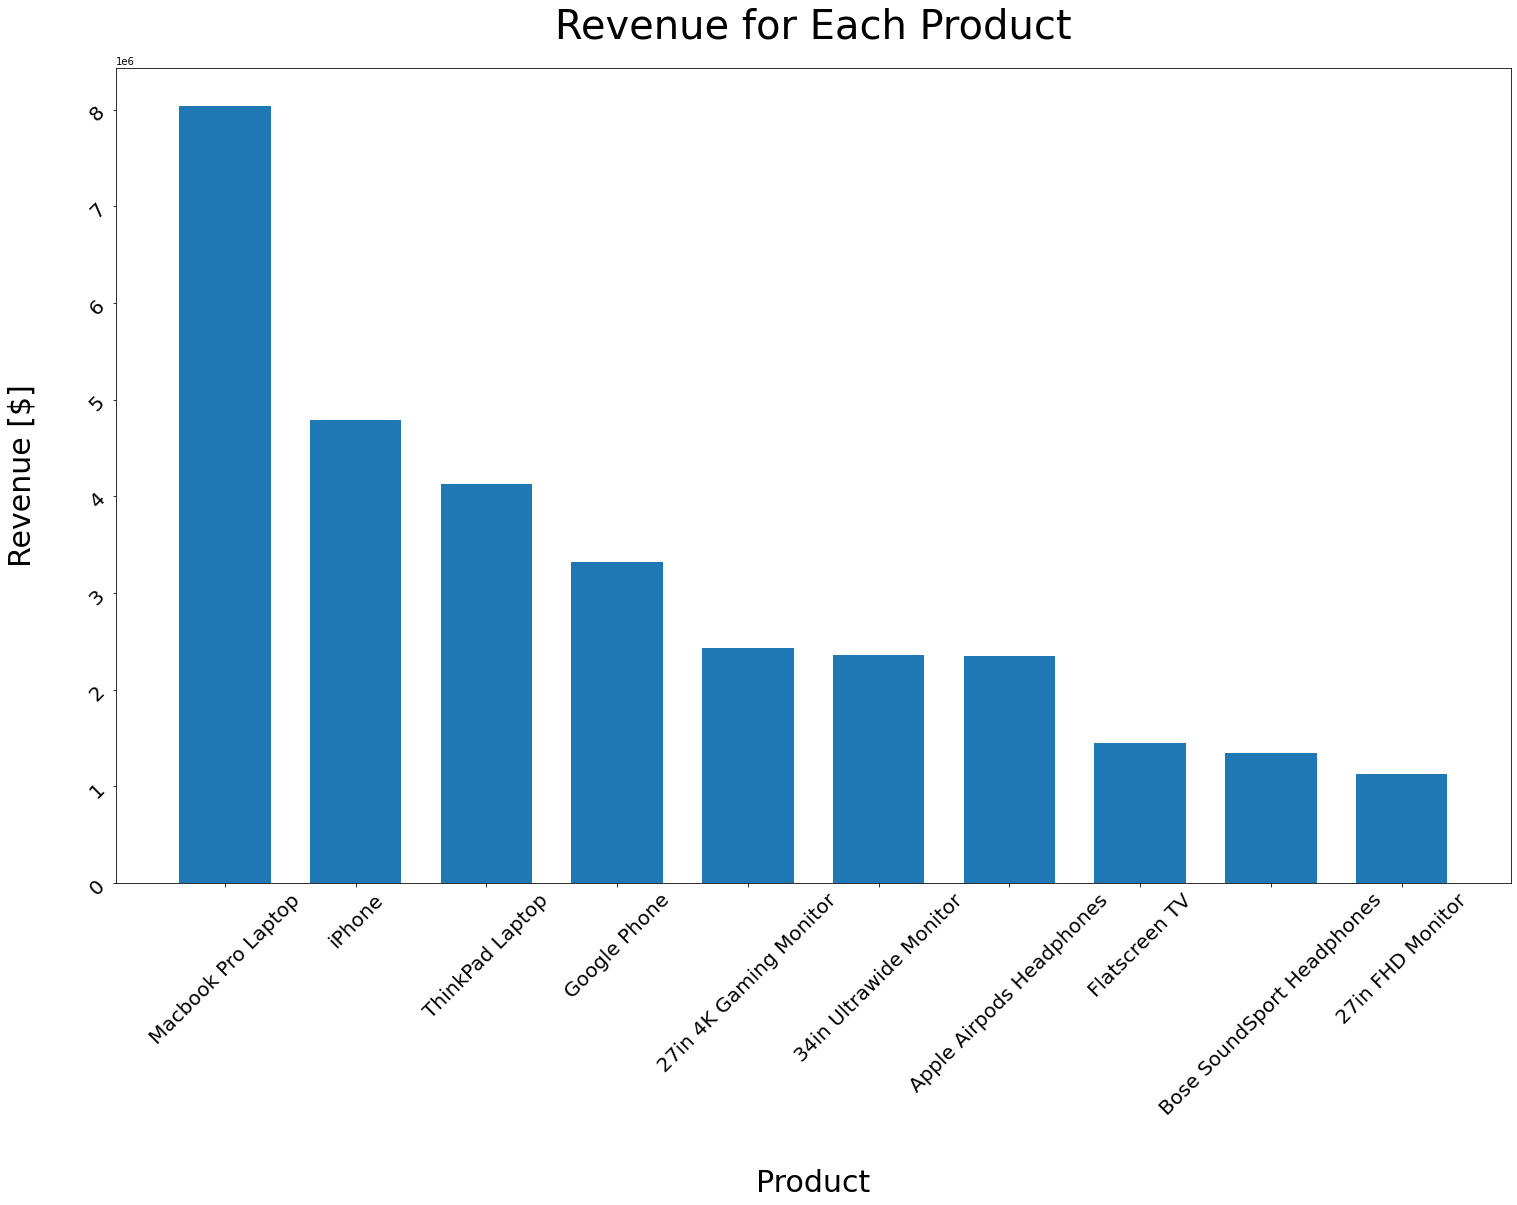

In [33]:
plt.figure(figsize=[25,15])
plt.bar(best_product_revenue['Product'], best_product_revenue['Revenue'], width=0.7)
plt.ylabel('Revenue [$]', fontsize=30, labelpad=50)
plt.xlabel('Product', fontsize=30, labelpad=50)
plt.tick_params(labelsize=20, labelrotation=45)
plt.title('Revenue for Each Product', fontsize=40, pad=30)

In [34]:
best_product_quantity = df[['Product', 'Quantity Ordered']].groupby('Product').sum().sort_values('Quantity Ordered', ascending=False).head(10).reset_index()
best_product_quantity

,Product,Quantity Ordered
0,AAA Batteries (4-pack),30985
1,AA Batteries (4-pack),27614
2,USB-C Charging Cable,23929
3,Lightning Charging Cable,23168
4,Wired Headphones,20522
5,Apple Airpods Headphones,15636
6,Bose SoundSport Headphones,13429
7,27in FHD Monitor,7541
8,iPhone,6847
9,27in 4K Gaming Monitor,6239


Text(0.5, 1.0, 'Quantity Sold for Each Product')

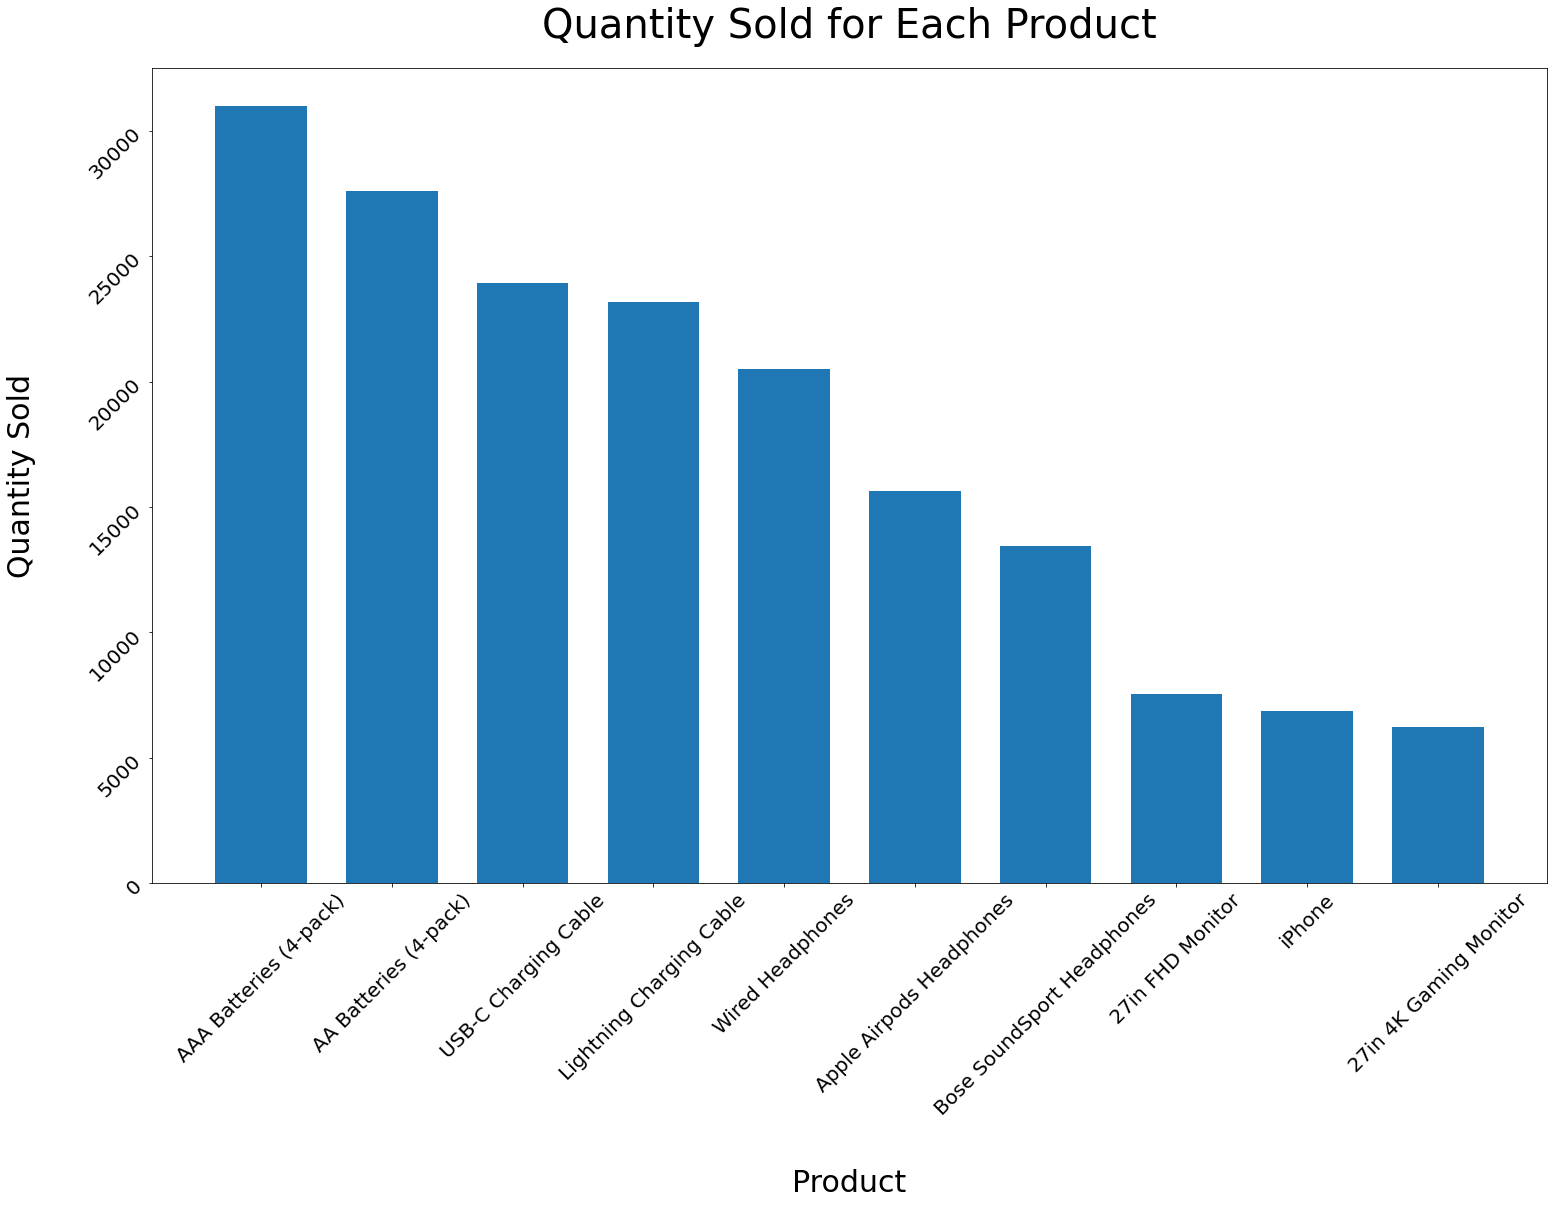

In [35]:
plt.figure(figsize=[25,15])
plt.bar(best_product_quantity['Product'], best_product_quantity['Quantity Ordered'], width=0.7)
plt.ylabel('Quantity Sold', fontsize=30, labelpad=50)
plt.xlabel('Product', fontsize=30, labelpad=50)
plt.tick_params(labelsize=20, labelrotation=45)
plt.title('Quantity Sold for Each Product', fontsize=40, pad=30)

### Exploratory Analysis - Is looking at correlation between variables to form hypothesis.